In [8]:
%load_ext autoreload
%autoreload 2


import pickle
import os

import open3d as o3d
import numpy as np
from open3d.web_visualizer import draw
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import mmdet3d

from mmdet3d.apis import inference_detector, init_model
# from sensus.utils.data_converter import pc2pc_object
from mmdet3d.utils import register_all_modules
from mmdet3d.structures.points import get_points_type
from mmdet3d.datasets.transforms.loading import LoadPointsFromFile

import sys
sys.path.append('../tools')
from visualizer import draw_lidar_labels, draw_lidar_results

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
bin_path = '/home/javier/datasets/DAIR/single-infrastructure-side-mmdet/training/velodyne/002238.bin'
labels_path = '/home/javier/datasets/DAIR/single-infrastructure-side-mmdet/training/label_2/002238.txt'
img_path = '/home/javier/datasets/DAIR/single-infrastructure-side-mmdet/training/image_2/002238.png'
calib_path = '/home/javier/datasets/DAIR/single-infrastructure-side-mmdet/training/calib/002238.txt'

## Visualize Labels

[Open3D INFO] Window window_0 created.
[Open3D INFO] EGL headless mode enabled.
[Open3D INFO] ICE servers: ["stun:stun.l.google.com:19302", "turn:user:password@34.69.27.100:3478", "turn:user:password@34.69.27.100:3478?transport=tcp"]
FEngine (64 bits) created at 0x7f35a000a250 (threading is enabled)
[Open3D INFO] Set WEBRTC_STUN_SERVER environment variable add a customized WebRTC STUN server.
[Open3D INFO] WebRTC Jupyter handshake mode enabled.
EGL(1.5)
OpenGL(4.1)


WebVisualizer(window_uid='window_0')

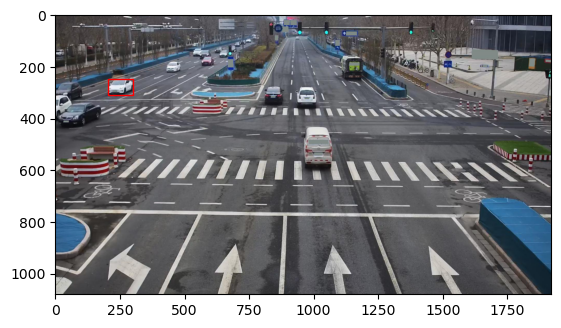

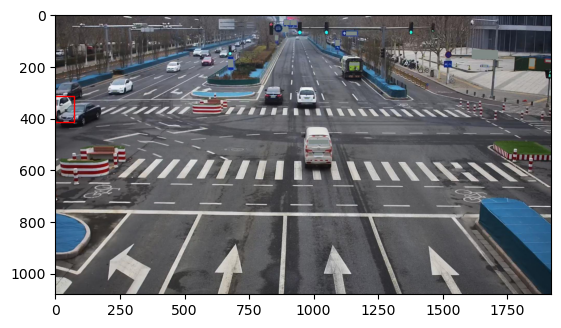

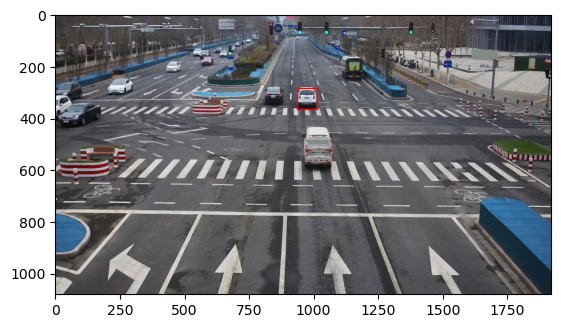

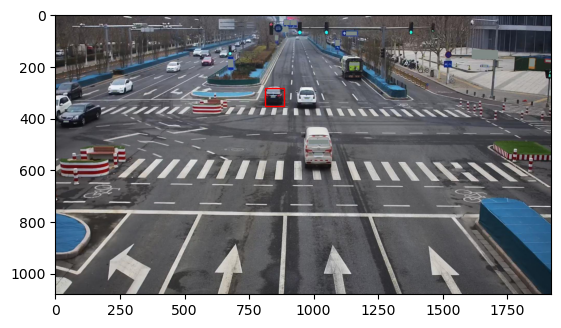

[Open3D INFO] [Called HTTP API (custom handshake)] /api/getIceServers
[Open3D INFO] [Called HTTP API (custom handshake)] /api/call
[Open3D INFO] [Called HTTP API (custom handshake)] /api/addIceCandidate
[Open3D INFO] [Called HTTP API (custom handshake)] /api/addIceCandidate
[Open3D INFO] [Called HTTP API (custom handshake)] /api/addIceCandidate
[Open3D INFO] [Called HTTP API (custom handshake)] /api/addIceCandidate
[Open3D INFO] [Called HTTP API (custom handshake)] /api/addIceCandidate
[Open3D INFO] [Called HTTP API (custom handshake)] /api/addIceCandidate
[Open3D INFO] [Called HTTP API (custom handshake)] /api/getIceCandidate
[Open3D INFO] DataChannelObserver::OnStateChange label: ServerDataChannel, state: open, peerid: 0.6486377220476358
[Open3D INFO] DataChannelObserver::OnStateChange label: ClientDataChannel, state: open, peerid: 0.6486377220476358
[Open3D INFO] Sending init frames to window_0.


[000:000][1196122] (stun_port.cc:96): Binding request timed out from 163.117.150.x:48755 (enp4s0)


In [4]:
draw_lidar_labels(bin_path, calib_path, labels_path, img_path, num_cars = 4)

## Inference

In [12]:
register_all_modules()

## Build the model from a config file and a checkpoint file
config = '/home/javier/sensus-loci/sensus/configs/centerpoint/centerpoint_voxel01_second_secfpn_8xb4-cyclic-20e_dair-3d.py'
checkpoint = '/home/javier/sensus-loci/work_dirs/centerpoint_voxel01_second_secfpn_8xb4-cyclic-20e_dair-3d/epoch_40.pth'

In [13]:
model = init_model(config, checkpoint, device='cuda:1')
result, data = inference_detector(model, bin_path)

Loads checkpoint by local backend from path: /home/javier/sensus-loci/work_dirs/centerpoint_voxel01_second_secfpn_8xb4-cyclic-20e_dair-3d/epoch_40.pth


## Sensus Viz

In [14]:
draw_lidar_results(bin_path, calib_path, result, num_cars=15)

[Open3D INFO] Window window_2 created.


WebVisualizer(window_uid='window_2')

[Open3D INFO] [Called HTTP API (custom handshake)] /api/getIceServers
[Open3D INFO] [Called HTTP API (custom handshake)] /api/call
[Open3D INFO] [Called HTTP API (custom handshake)] /api/addIceCandidate
[Open3D INFO] [Called HTTP API (custom handshake)] /api/addIceCandidate
[Open3D INFO] [Called HTTP API (custom handshake)] /api/addIceCandidate
[Open3D INFO] [Called HTTP API (custom handshake)] /api/addIceCandidate
[Open3D INFO] [Called HTTP API (custom handshake)] /api/addIceCandidate
[Open3D INFO] [Called HTTP API (custom handshake)] /api/addIceCandidate
[Open3D INFO] [Called HTTP API (custom handshake)] /api/getIceCandidate
[Open3D INFO] DataChannelObserver::OnStateChange label: ServerDataChannel, state: open, peerid: 0.48159262091530985
[Open3D INFO] DataChannelObserver::OnStateChange label: ClientDataChannel, state: open, peerid: 0.48159262091530985
[Open3D INFO] Sending init frames to window_2.


[356:680][1196122] (stun_port.cc:96): Binding request timed out from 163.117.150.x:55252 (enp4s0)
